In [12]:
#程式碼取自 博碩, "Python 機器學習", ISBN 978-986-434-140-5, by Sebastian Raschka, 為練習Python函式庫用途
#僅供履歷作品集使用
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoid',
                  'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

 1. Alcohol                        0.182483
 2. Malic acid                     0.158610
 3. Ash                            0.150948
 4. Alcalinity of ash              0.131987
 5. Magnesium                      0.106589
 6. Total phenols                  0.078243
 7. Flavanoid                      0.060718
 8. Nonflavanoid phenols           0.032033
 9. Proanthocyanins                0.025400
10. Color intensity                0.022351
11. Hue                            0.022078
12. OD280/OD315 of diluted wines   0.014645
13. Proline                        0.013916


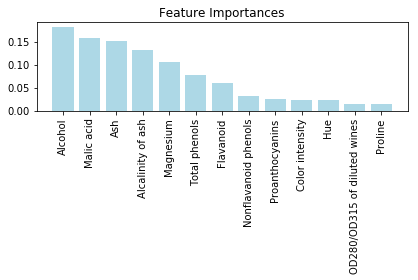

In [13]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d. %-*s %f" %(f+1, 30, feat_labels[f], importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color = 'lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()